# Лабораторная работа 4. Кластеризация 


### Цель работы
Изучение алгоритмов и методов кластеризации на практике.

**Вариант 1**

## Часть 1

#### 1 - 2 Использование функции для создания набора данных и ее применение

Был создан синтетический набор данных из трех групп по 50 записей с двумя признаками (x, y), суммарно 150. Применение параметра seed = 42 обеспечивает воспроизводимость результатов. создаются три группы объектов, каждая из которых имеет нормальное распределение, но отличается своим смещением в пространстве признаков.


In [4]:
import numpy as np
import pandas as pd
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df
    
# Создание набора данных
df = make_data(n=50, seed=42)
df.head()


,x,y
33,38.845781,1.240865
23,31.505036,2.282322
50,91.692585,4.625246
63,169.264842,4.089659
88,136.270344,4.076603


#### 3 - 6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров. Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации

Перед применением алгоритмов кластеризации важно привести признаки к единому масштабу. Это связано с тем, что метод KMeans использует евклидово расстояние, и если один признак имеет гораздо больший разброс, он начинает доминировать над остальными. Стандартизация была проведена через StandrdScaler. После такого преобразования признаки имеют среднее значение 0 и стандартное отклонение 1.

Алгоритм K-Means выполняет несколько запусков с разной случайной инициализацией центров и выбирает лучшее решение, минимизирующее сумму квадратов расстояний до ближайшего центра.

Модель была обучена методом fit_predict, который одновременно выполняет обучение и присваивает каждой точке метку соответствующего кластера.

Центры кластеров исходно определяются в стандартизованном пространстве, поэтому для их визуализации в исходных единицах измерения было выполнено обратное преобразование, это позволяет корректно отображать центры на плоскости исходных признаков x и y.

Визуализация на графике показывает объекты разных кластеров, окрашеные различными цветами, и центры кластеров. Такое графическое представление позволяет оценить корректность разбиения и наглядно увидеть структуру данных.

C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Коэффициент силуэта (k=3): 0.7242054688229007


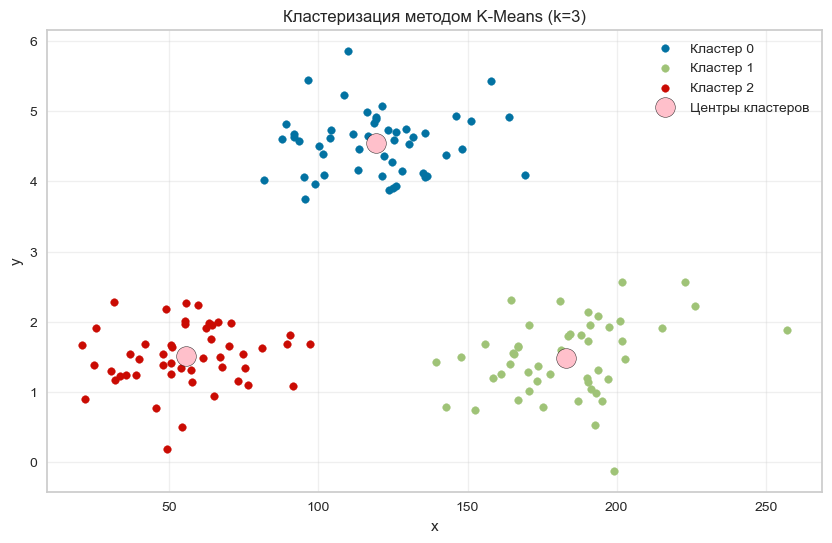

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

# Инициализация модели K-Means с явным указанием n_init
km3 = KMeans(n_clusters=3, random_state=42, n_init=10)

# Обучение модели и получение меток
labels3 = km3.fit_predict(X_scaled)

# Расчет коэффициента силуэта
sil3 = silhouette_score(X_scaled, labels3)

# Обратное преобразование центров кластеров в исходный масштаб
centers3 = scaler.inverse_transform(km3.cluster_centers_)

print('Коэффициент силуэта (k=3):', sil3)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))

# Построение точек каждого кластера
for lab in np.unique(labels3):
    plt.scatter(df['x'].values[labels3 == lab],
                df['y'].values[labels3 == lab],
                s=30,
                label=f'Кластер {lab}')

# Центры кластеров
plt.scatter(centers3[:, 0], centers3[:, 1],
            color='pink', s=200, edgecolors='black',
            label='Центры кластеров')

plt.title('Кластеризация методом K-Means (k=3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### 7 Повторение пунктов 4 - 6 для n_clusters = 2 и n_clusters = 4

C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Коэффициент силуэта (k=2): 0.49890989516429823


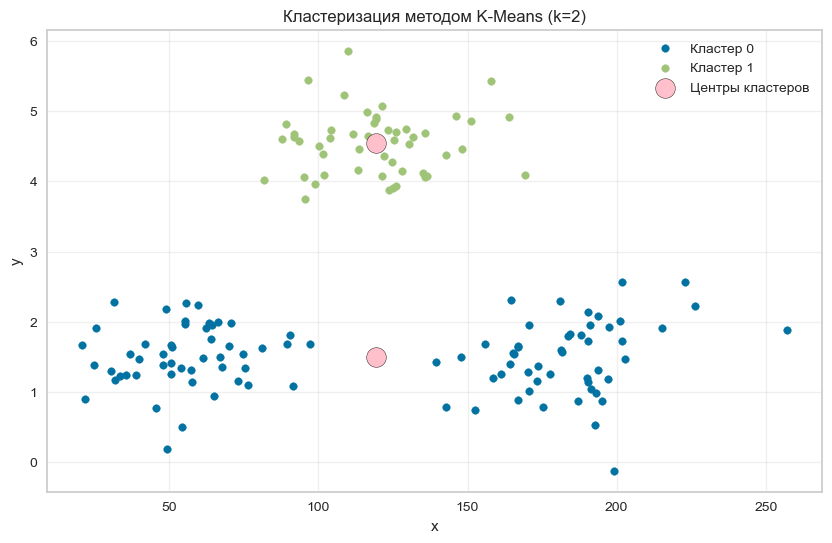

C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Коэффициент силуэта (k=4): 0.6104795001622662


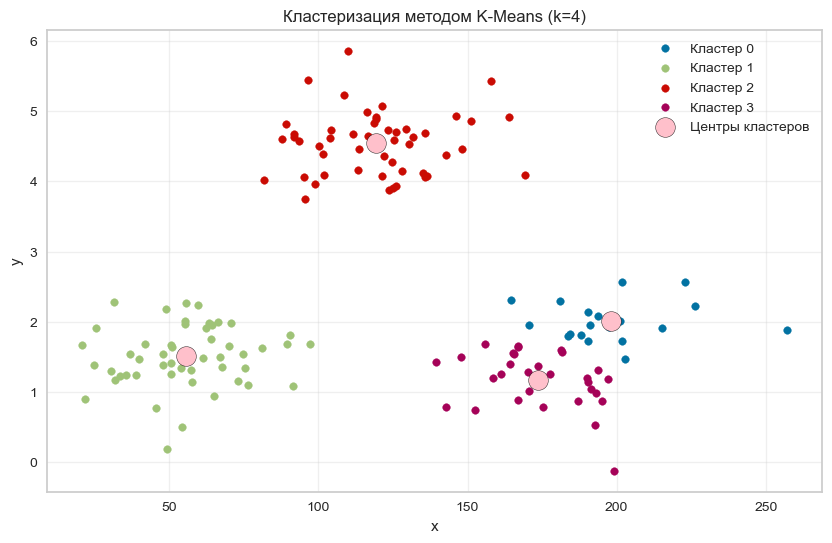

In [14]:
# k = 2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

km2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)

print('Коэффициент силуэта (k=2):', sil2)

plt.figure(figsize=(10, 6))
for lab in np.unique(labels2):
    plt.scatter(df['x'].values[labels2 == lab],
                df['y'].values[labels2 == lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2[:, 0], centers2[:, 1],
            color='pink', s=200, edgecolors='black', label='Центры кластеров')
plt.title('Кластеризация методом K-Means (k=2)')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()


# k = 4
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

km4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)

print('Коэффициент силуэта (k=4):', sil4)

plt.figure(figsize=(10, 6))
for lab in np.unique(labels4):
    plt.scatter(df['x'].values[labels4 == lab],
                df['y'].values[labels4 == lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers4[:, 0], centers4[:, 1],
            color='pink', s=200, edgecolors='black', label='Центры кластеров')
plt.title('Кластеризация методом K-Means (k=4)')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

### Выводы

- При k=2 коэффициент силуэта составляет 0.4989. Данные разделяются на две группы: одна охватывает область с высокими значениями обеих координат (x>100, y>1), вторая - остальную часть пространства. Однако граница между кластерами нечёткая: наблюдается значительное перекрытие. Низкое значение коэффициента силуэта указывает на недостаточную компактность кластеров и слабую их отделимость. Это свидетельствует о том, что предположение о наличии двух кластеров не согласуется с внутренней структурой данных.
- При k=3 коэффициент силуэта достигает максимального значения — 0.7243. Визуально выделяются три компактные и хорошо разделимые группы. Центроиды кластеров находятся вблизи центров масс соответствующих групп, что подтверждает устойчивость полученного разбиения. Высокое значение коэффициента силуэта и отсутствие существенного перекрытия между кластерами указывают на адекватное отражение структуры данных.
- При k=4 коэффициент силуэта снижается до 0.6184. Одна из групп, выделенных при k=3 (а именно — кластер с низкими значениями y и средними x), разделяется на два подкластера без явного основания в распределении данных. Эти подкластеры демонстрируют частичное перекрытие и меньшую компактность по сравнению с кластерами при k=3. Снижение коэффициента силуэта говорит о том, что увеличение числа кластеров приводит к избыточной фрагментации.

  Таким образом, значение k=3 обеспечивает оптимальный баланс между компактностью внутри кластеров и их взаимной отделимостью. Оно максимизирует коэффициент силуэта и соответствует визуально наблюдаемой структуре данных. Использование k=2 приводит к недообучению, а k=4 — к переобучению. 

#### 8 Построение графика по методу локтя

Этот метод основывается на анализе зависимости inertia — суммы квадратов расстояний точек до центров своих кластеров — от числа кластеров k. По мере увеличения количества кластеров inertia уменьшается, так как объекты разбиваются на более мелкие и плотные группы. Однако после определённого значения k уменьшение становится незначительным.Этот «излом» на графике и называется локтем — он указывает на оптимальное количество кластеров, при котором баланс между качеством разбиения и сложностью модели является наиболее рациональным.

На построенном графике чётко видно, что после k = 3 темп снижения inertia замедляется. При k=1 и k=2 наблюдается сильное уменьшение ошибки, а после k=3 линия выравнивается и дальнейшее увеличение числа кластеров даёт минимальный выигрыш.

Таким образом, метод локтя подтверждает, что оптимальное число кластеров — k = 3, что совпадает с исходной структурой сгенерированных данных и результатами анализа по коэффициенту силуэта.

C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

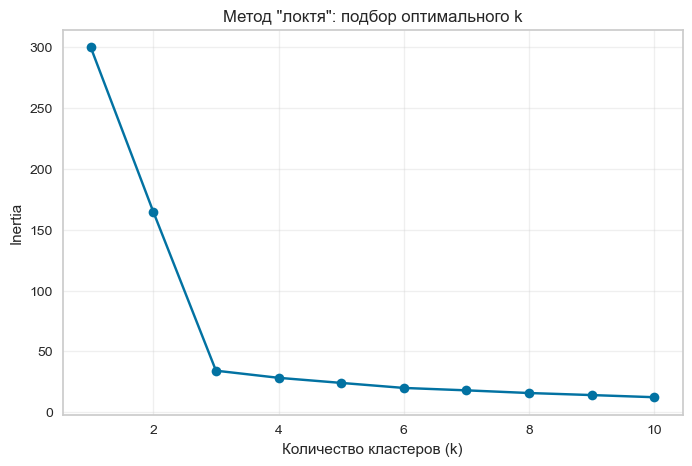

In [15]:
# Вектор для хранения значений инерции
inertias = []

# Перебираем количество кластеров k от 1 до 10
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Построение графика по методу локтя
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Метод "локтя": подбор оптимального k')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.grid(alpha=0.3)
plt.show()

#### Выводы
Точка «локтя» наблюдается при k=3. До этого значения каждое увеличение числа кластеров приводит к существенному улучшению качества модели (резкое снижение Inertia). Начиная с k=4, дополнительные кластеры дают минимальный прирост в снижении ошибки, что свидетельствует об избыточности разбиения.


## Часть 2

#### 1 Загрузка набора данных

Набор данных о кредитном риске загружен. Он включает 3041 запись с 10 признаками, охватывающими демографические, финансовые и кредитные характеристики заемщиков, а также целевую переменную Default.

In [19]:
df = pd.read_csv("medical_diagnosis.csv")
df.head(5)

,age,sex,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,smoking_status,family_history,activity_level,symptom_score,CRP_mg_L,WBC_10e9_L,ECG_result,Disease
0,34,Male,16.8,132.0,196.0,78.0,Current,No,High,0.2,0.58,8.60,Normal,0
1,24,Female,29.2,118.0,182.0,96.0,Current,No,Moderate,3.2,2.72,6.54,Normal,0
2,19,Female,16.5,121.0,268.0,101.0,Current,No,Moderate,3.8,0.18,6.61,Normal,0
3,89,Female,15.4,117.0,136.0,96.0,Never,No,Low,2.6,1.83,5.67,Normal,0
4,66,Male,16.7,82.0,241.0,126.0,Former,No,Moderate,3.5,1.16,2.66,Normal,0


Набор данных `medical_diagnosis.csv` содержит информацию о болезнях

- age — возраст пациента (лет), числовой.
- sex — пол: Male / Female, категориальный.
- BMI — индекс массы тела (кг/м²), числовой.
- systolic_bp — систолическое артериальное давление, мм рт. ст., числовой.
- cholesterol_mg_dl — общий холестерин сыворотки, мг/дл, числовой.
- fasting_glucose_mg_dl — глюкоза крови натощак, мг/дл, числовой.
- smoking_status — статус курения: Never / Former / Current, категориальный.
- family_history — наследственность по заболеванию: Yes / No, категориальный.
- activity_level — уровень физической активности: Low / Moderate / High,
категориальный.
- symptom_score — суммарная выраженность симптомов (0–10), числовой.
- CRP_mg_L — C-реактивный белок, мг/л (маркер воспаления), числовой.
- WBC_10e9_L — лейкоциты, ×10⁹/л, числовой.
- ECG_result — результат ЭКГ: Normal / ST-T abnormality / LVH, категориальный.
- Disease — целевой класс: 1 — болеет, 0 — не болеет.


#### 2 Предобработка данных

Первичный анализ данных, позволяющий понять структуру набора: количество признаков и наблюдений, типы данных и возможные проблемы. Такой анализ необходим, чтобы убедиться в корректности данных и определить необходимость последующей предобработки — масштабирования, очистки или удаления выбросов.

In [23]:
display(df.info())
display(df.describe())
print(df.isna().sum())
duplicate_rows = df[df.duplicated()]
print("Количество явных дубликатов:", duplicate_rows.shape[0])
print("Уникальные значения:")
print(df['sex'].unique(), "\n")
print(df['smoking_status'].unique(), "\n")
print(df['family_history'].unique(), "\n")
print(df['activity_level'].unique(), "\n")
print(df['ECG_result'].unique(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3031 non-null   int64  
 1   sex                    3031 non-null   object 
 2   BMI                    3031 non-null   float64
 3   systolic_bp            3031 non-null   float64
 4   cholesterol_mg_dl      3031 non-null   float64
 5   fasting_glucose_mg_dl  3031 non-null   float64
 6   smoking_status         3031 non-null   object 
 7   family_history         3031 non-null   object 
 8   activity_level         3031 non-null   object 
 9   symptom_score          3031 non-null   float64
 10  CRP_mg_L               3031 non-null   float64
 11  WBC_10e9_L             3031 non-null   float64
 12  ECG_result             3031 non-null   object 
 13  Disease                3031 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 331.6+ 

None

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
count,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000,3031.000000
mean,53.176509,26.465886,122.417684,202.744903,94.366216,2.040185,1.380625,6.825094,0.016166
std,20.740090,5.869822,17.859825,53.735636,19.547096,1.357714,3.159757,1.980929,0.126136
min,18.000000,13.500000,82.000000,85.000000,56.000000,0.000000,0.100000,2.300000,0.000000
25%,35.000000,22.500000,110.000000,171.000000,80.500000,1.000000,0.100000,5.480000,0.000000
50%,53.000000,26.300000,122.000000,200.000000,94.000000,2.000000,0.520000,6.750000,0.000000
75%,71.000000,30.400000,134.000000,232.000000,107.000000,3.000000,1.460000,8.150000,0.000000
max,89.000000,50.900000,184.000000,658.200000,163.000000,6.800000,43.450000,13.720000,1.000000


age                      0
sex                      0
BMI                      0
systolic_bp              0
cholesterol_mg_dl        0
fasting_glucose_mg_dl    0
smoking_status           0
family_history           0
activity_level           0
symptom_score            0
CRP_mg_L                 0
WBC_10e9_L               0
ECG_result               0
Disease                  0
dtype: int64
Количество явных дубликатов: 1
Уникальные значения:
['Male' 'Female'] 

['Current' 'Never' 'Former'] 

['No' 'Yes'] 

['High' 'Moderate' 'Low'] 

['Normal' 'ST-T abnormality' 'LVH'] 



Датасет содержит 3031 наблюдение и 14 переменных. Все столбцы полностью заполнены: отсутствуют пропущенные значения и выбросы. При проверке на явные дубликаты (полностью идентичные строки) было обнаружено одно повторяющееся наблюдение.

In [24]:
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Количество явных дубликатов:", duplicate_rows.shape[0])

Количество явных дубликатов: 0


#### 3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния

В качестве целевой переменной была выделена переменная Disease, принимающая значения: 1 — пациент имеет заболевание, 0 — пациент здоров.

После определения целевой переменной был сформирован набор признаков — все столбцы исходного датафрейма за исключением столбца Disease. Для построения матрицы диаграмм рассеяния использовались только числовые переменные.

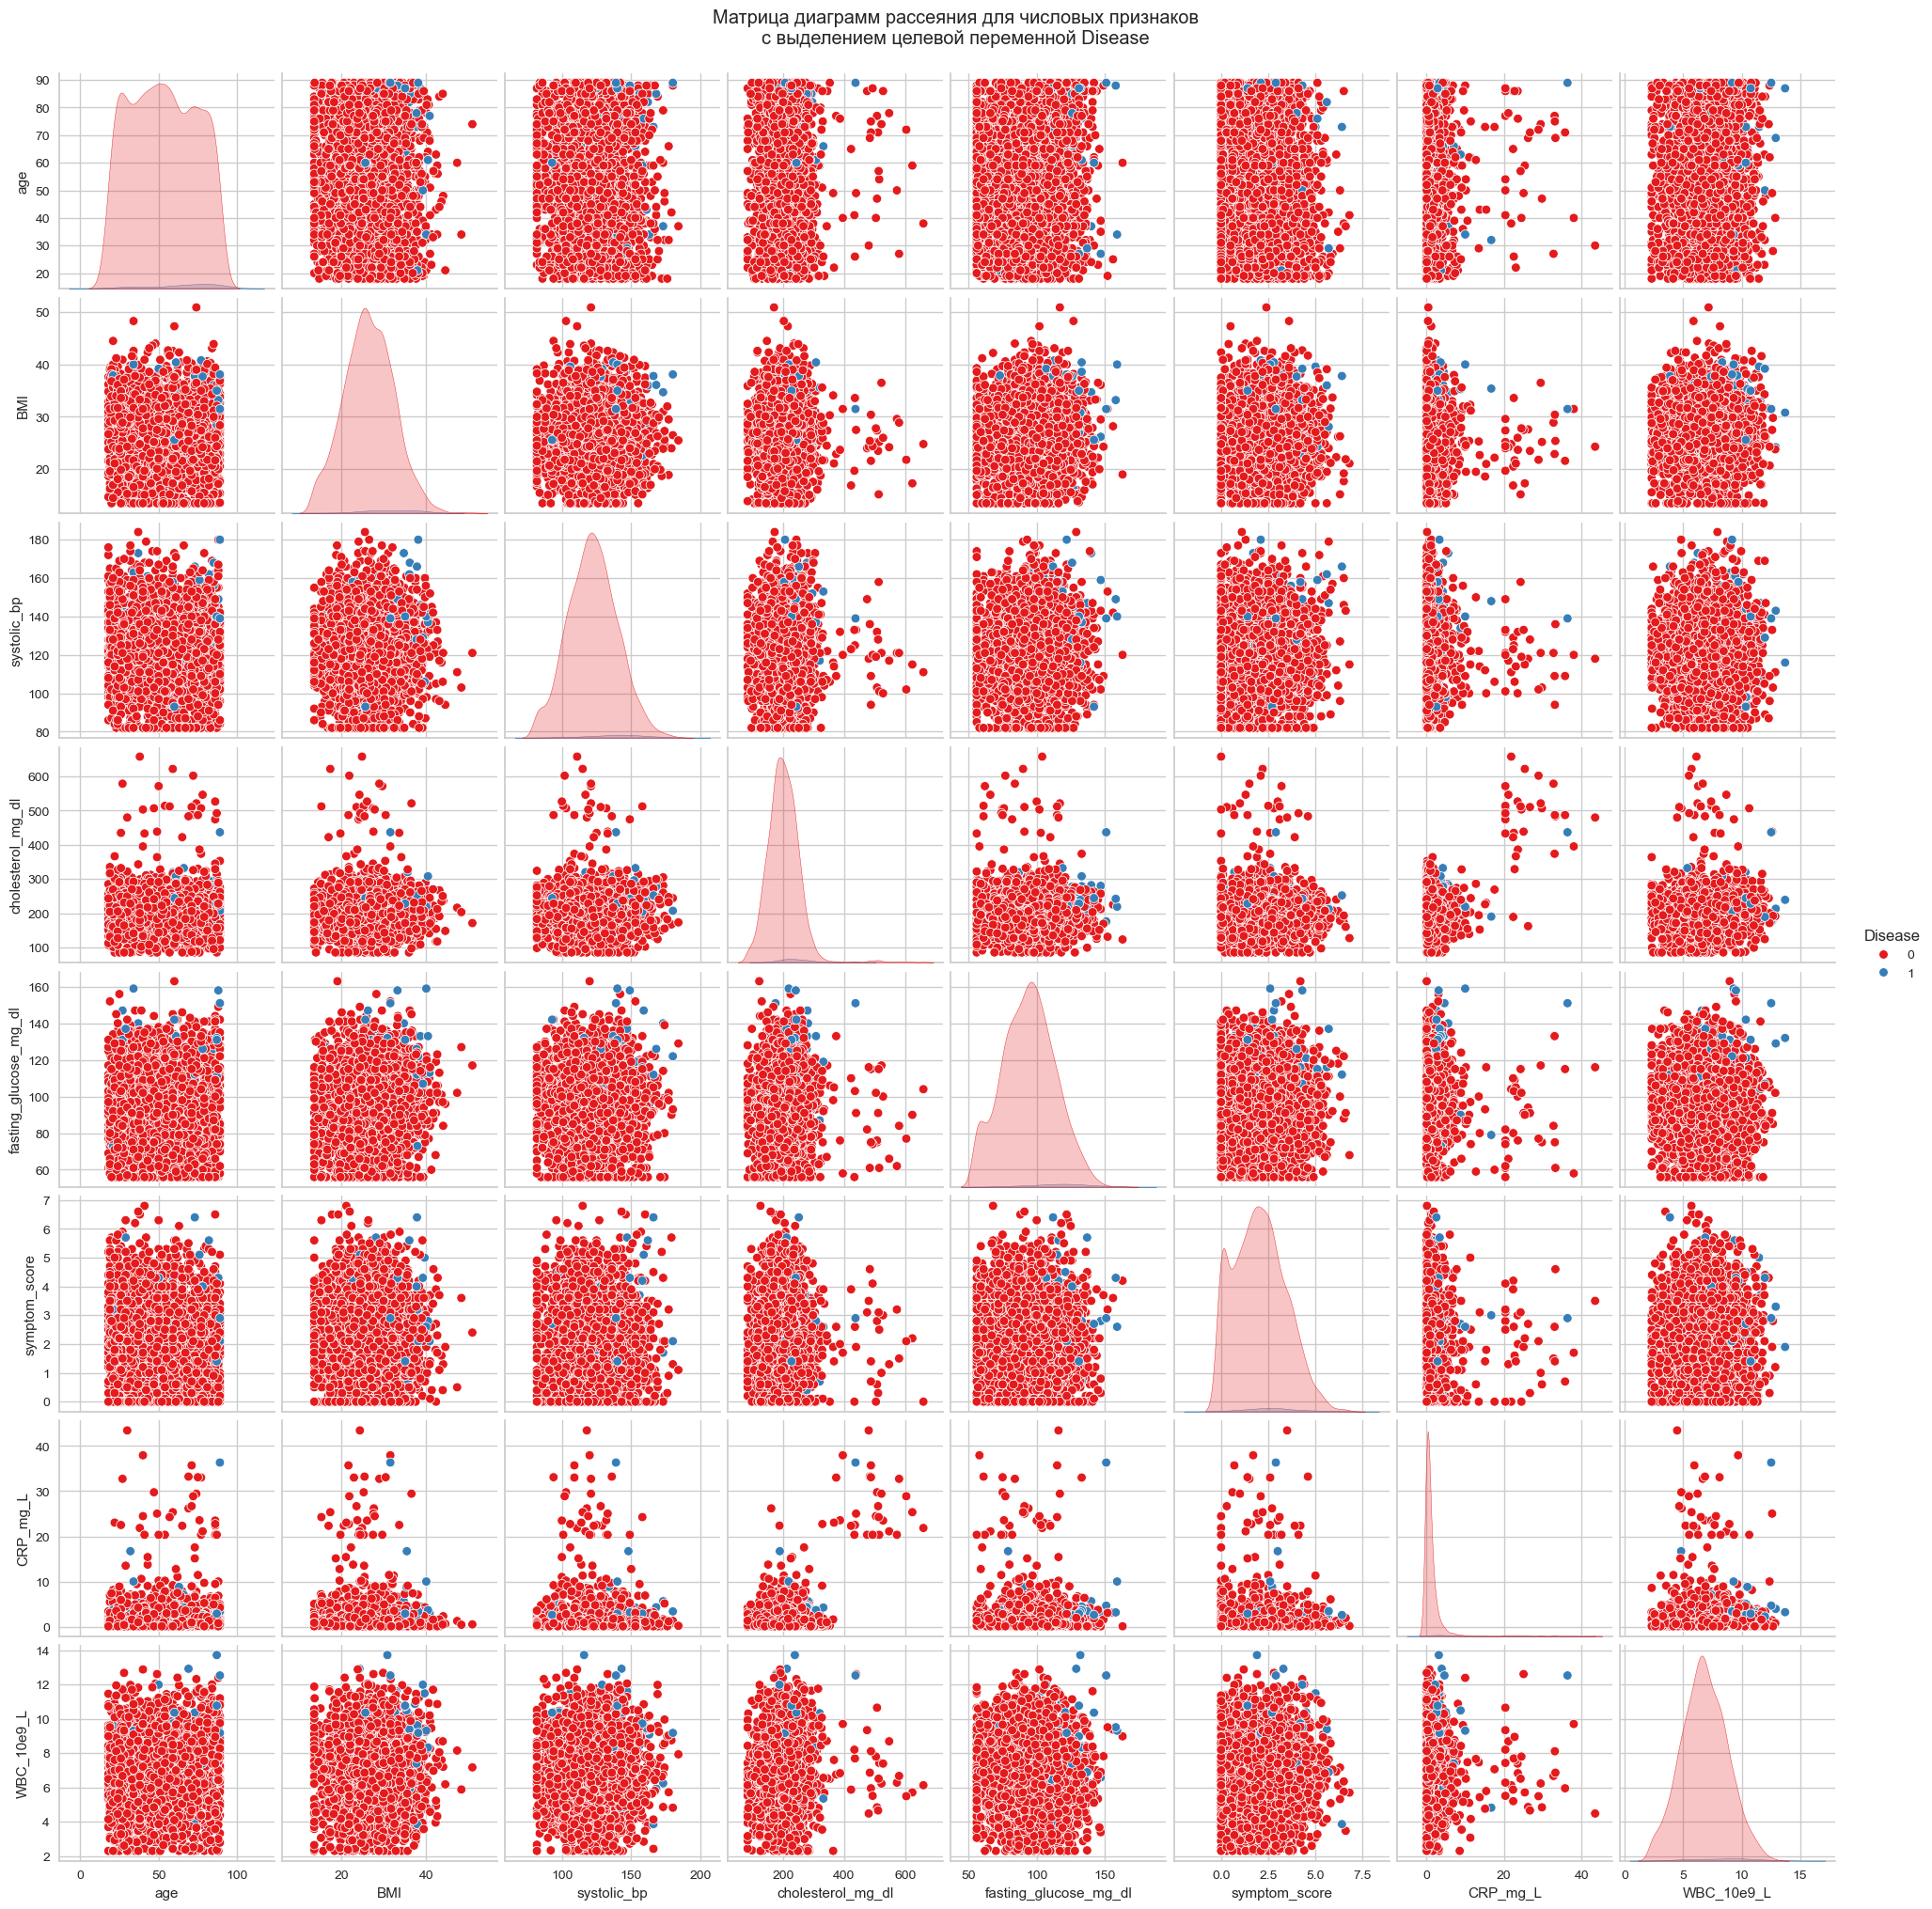

In [28]:
import seaborn as sns

# Выделение целевой переменной
target = "Disease"
# Удаляем целевую переменную из признаков
features = df.drop(columns=[target])
numeric_cols = features.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = features.select_dtypes(include=['object','category']).columns.tolist()
# В матрицу включаем только числовые признаки, раскрашиваем по Disease
sns.pairplot(df[numeric_cols + [target]], hue=target, diag_kind="kde", palette="Set1")

plt.suptitle("Матрица диаграмм рассеяния для числовых признаков\nс выделением целевой переменной Disease", y=1.02)
plt.show()

По полученным диаграммам можно сделать следующие выводы:
- наиболее выраженная ассоциация с целевой переменной наблюдается у оценки симптомов (symptom_score). Пациенты с подтверждённым диагнозом систематически демонстрируют более высокие значения этого показателя, что подтверждает его клиническую значимость как основного маркера патологического состояния.
- заметную дифференцирующую способность имеют воспалительные биомаркеры — С-реактивный белок (CRP_mg_L) и уровень лейкоцитов (WBC_10e9_L). У больных пациентов эти показатели в среднем выше, что може/т указывать на воспалительную природу изучаемого заболевания или на сопутствующую системную реакцию организма.
- Среди прочих признаков умеренную предсказательную способность демонстрируют возраст и уровень глюкозы натощак: с возрастом и при повышении гликемии вероятность наличия заболевания несколько увеличивается. В то же время такие параметры, как систолическое артериальное давление, индекс массы тела (BMI) и уровень холестерина, показывают слабую или нечёткую связь с целевой переменной — их распределения у здоровых и больных пациентов сильно перекрываются, что снижает их самостоятельную прогностическую ценность.

#### 4 Стандартизация числовых данных

Стандартизация была выполнена для всего набора признаков. Это предотвратило доминирование признаков с большим разбросом в расчете евклидова расстояния K-Means.

Также была проведена нормализация категориальных данных для того, чтобы их тоже можно было использовать при анализе

In [29]:
# Стандартизация числовых данных
new_scaler = StandardScaler()
X_prepared = new_scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(X_prepared, columns=numeric_cols)
# Нормализация категориальных данных
df_encoded = pd.get_dummies(df[cat_cols], prefix=cat_cols)
# Конкатенация
X_final = pd.concat([df_scaled, df_encoded], axis=1)
display(X_final)
new_df = X_final.copy()

,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,sex_Female,sex_Male,...,smoking_status_Former,smoking_status_Never,family_history_No,family_history_Yes,activity_level_High,activity_level_Low,activity_level_Moderate,ECG_result_LVH,ECG_result_Normal,ECG_result_ST-T abnormality
0,-0.924683,-1.646659,0.536756,-0.124468,-0.837332,-1.355391,-0.253266,0.898226,False,True,...,False,False,True,False,True,False,False,False,True,False
1,-1.406845,0.465852,-0.247172,-0.385835,0.083526,0.854208,0.430358,-0.143157,True,False,...,False,False,True,False,False,False,True,False,True,False
2,-1.647925,-1.697768,-0.079187,1.219706,0.339319,1.296128,-0.381046,-0.107770,True,False,...,False,False,True,False,False,False,True,False,True,False
3,1.727203,-1.885168,-0.303167,-1.244613,0.083526,0.412288,0.146047,-0.582965,True,False,...,False,True,True,False,False,True,False,False,True,False
4,0.618233,-1.663695,-2.262986,0.715641,1.618288,1.075168,-0.067984,-2.104597,False,True,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,0.184287,-1.919241,1.992622,5.782431,1.055542,0.780555,7.314513,-0.158323,True,False,...,False,False,True,False,False,False,True,False,False,True
3027,-0.587171,-1.152604,0.592751,4.303840,-1.962824,-1.502698,6.062268,0.696016,True,False,...,False,True,False,True,False,True,False,True,False,False
3028,1.052178,0.670289,-1.591048,5.311970,-0.990808,-0.471551,10.132066,0.650518,False,True,...,True,False,False,True,False,False,True,False,True,False
3029,0.907529,-0.794840,-1.143089,7.462649,-0.888491,0.044022,8.790374,-0.673959,False,True,...,True,False,True,False,False,False,True,False,True,False


#### 5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров. 

Оптимальное количество кластеров было подобрано с помощью KElbowVisualizer, оптимальным количеством кластеров по графику методом локтя является 4 кластера


C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MK

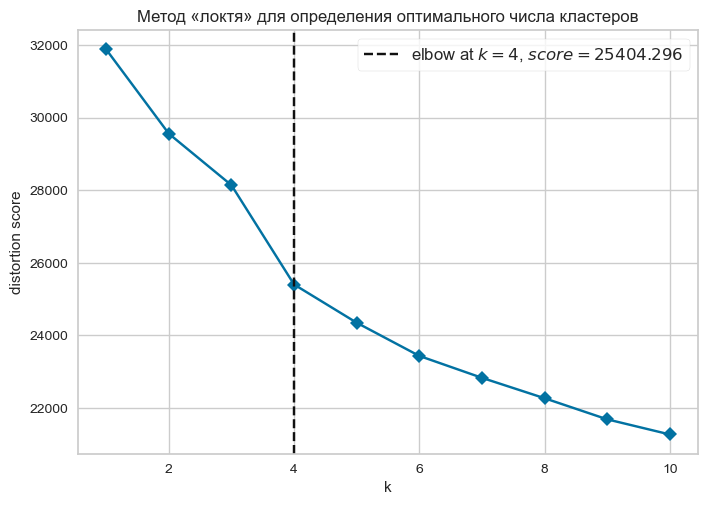

<Axes: title={'center': 'Метод «локтя» для определения оптимального числа кластеров'}, xlabel='k', ylabel='distortion score'>

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=50)

visualizer = KElbowVisualizer(
    model, 
    k=(1, 11),
    timings=False,
    title="Метод «локтя» для определения оптимального числа кластеров",
    xlabel="Число кластеров (k)",
    ylabel="Инерция (сумма квадратов расстояний до центроидов)"
)

visualizer.fit(new_df_clean)
visualizer.show()


#### 6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [47]:
OPTIMAL_K = 4

# Обучение KMeans на подготовленных данных (new_df_clean — без NaN)
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=50)
cluster_labels = kmeans.fit_predict(new_df_clean)

# Создаём датафрейм для интерпретации: только те строки, что использовались в кластеризации
df_interpret = df.loc[new_df_clean.index].copy()
df_interpret['cluster'] = cluster_labels

# Средние значения по числовым признакам в каждом кластере
cluster_summary = df_interpret.groupby('cluster').mean(numeric_only=True).round(2)

print(f"Средние показатели по кластерам (k = {OPTIMAL_K}):")
display(cluster_summary)

print("\nРазмеры кластеров:")
display(df_interpret['cluster'].value_counts().sort_index())

Средние показатели по кластерам (k = 4):


C:\Users\Mi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster,,,,,,,,,
0,61.72,25.07,120.62,456.96,90.38,2.08,26.23,7.28,0.03
1,73.85,25.52,123.22,200.80,96.85,1.74,1.16,6.94,0.02
2,42.84,27.22,127.38,200.59,95.06,3.46,1.08,6.94,0.02
3,38.34,26.92,117.09,198.00,91.03,1.10,1.05,6.58,0.00



Размеры кластеров:


cluster
0      32
1    1132
2     884
3     981
Name: count, dtype: int64

#### Выводы
Первый кластер (n = 32) выделяется как наиболее патологический по лабораторным маркерам, несмотря на относительно небольшой размер. Пациенты в этой группе имеют средний возраст 61.7 года, что указывает на пожилых. Однако главной особенностью является резко повышенный уровень холестерина (457 мг/дл) — почти в 2.3 раза выше среднего по выборке и значительно превышающий верхнюю границу нормы (200 мг/дл). Параллельно наблюдается выраженный системный воспалительный ответ: уровень СРБ достигает 26.2 мг/л (норма < 3–5 мг/л). При этом симптоматика умеренная (2.08 балла), а частота подтверждённого заболевания составляет всего 3%.

Второй кластер (n = 1132) — самый многочисленный и представляет собой пожилую, но в целом стабильную популяцию. Средний возраст — 73.9 года, что делает его самой возрастной группой. При этом все метаболические и воспалительные маркеры находятся в пределах нормы: холестерин — 200.8 мг/дл, СРБ — 1.16 мг/л, лейкоциты — 6.94 ×10⁹/л. Симптоматика минимальна (1.74 балла), а заболеваемость — 2%. Этот кластер можно рассматривать как пример успешного или компенсированного старения, когда, несмотря на возраст, отсутствуют признаки системного воспаления или нарушения обмена веществ. Такие пациенты могут служить контрольной группой при изучении факторов, способствующих сохранению здоровья в пожилом возрасте.

Третий кластер (n = 884) объединяет средневозрастных пациентов (42.8 года) с выраженной субъективной симптоматикой (3.46 балла), но при этом отсутствием объективных лабораторных отклонений: СРБ (1.08 мг/л), лейкоциты (6.94), холестерин (200.6 мг/дл) — все в норме. Частота подтверждённого заболевания также низкая — 2%. Эта группа демонстрирует диссоциацию между субъективным восприятием здоровья и объективными биомаркерами. Возможно, здесь преобладают пациенты с функциональными расстройствами, психосоматическими жалобами или гипервниманием к своему состоянию. Для этой категории важны не столько лабораторные обследования, сколько оценка качества жизни, психоэмоционального статуса и подходы поведенческой медицины.

Четвёртый кластер (n = 981) представляет собой молодую, практически здоровую популяцию (средний возраст — 38.3 года). Все показатели — от холестерина (198 мг/дл) до СРБ (1.05 мг/л) — находятся в пределах физиологической нормы, симптоматика минимальна (1.10 балла), и среди них не выявлено ни одного подтверждённого случая заболевания.



#### 7 Вычисление метрик качества

Были вычислены как внутренние, так и внешние метрики качества кластеризации. Среди внутренних метрик использовались коэффициент силуэта (Silhouette Score), индекс Калинского–Харабаша (Calinski-Harabasz Index) и индекс Дэвиса–Боулдина (Davies-Bouldin Index), которые оценивают компактность и разделимость кластеров без привлечения внешней информации. Среди внешних метрик — скорректированный индекс Рэнда (Adjusted Rand Index, ARI) и гомогенность (Homogeneity Score), сравнивающие полученное разбиение с целевой переменной Disease.

In [51]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    homogeneity_score
)
import numpy as np

# 1. Внутренние метрики (только по признакам, без Disease)
X = new_df_clean.values  # подготовленные данные (без NaN, стандартизированные + закодированные)
labels = df_interpret['cluster'].values  # метки кластеров
print(f"Silhouette Score:          {silhouette_score(X, labels):.4f}")
print(f"Calinski-Harabasz Index:   {calinski_harabasz_score(X, labels):.2f}")
print(f"Davies-Bouldin Index:      {davies_bouldin_score(X, labels):.4f}")

# 2. Внешние метрики (сравнение с целевой переменной Disease)
# Примечание: Disease сильно несбалансирована (0.016), поэтому метрики будут низкими,
# но всё равно информативными.

true_labels = df_interpret['Disease'].values

# ARI и Homogeneity показывают, насколько кластеры совпадают с реальными классами
print(f"Adjusted Rand Index (ARI): {adjusted_rand_score(true_labels, labels):.4f}")
print(f"Homogeneity Score:         {homogeneity_score(true_labels, labels):.4f}")

Silhouette Score:          0.0719
Calinski-Harabasz Index:   257.22
Davies-Bouldin Index:      2.4433
Adjusted Rand Index (ARI): 0.0003
Homogeneity Score:         0.0413


#### Выводы

- Silhouette Score, составивший 0.0719, указывает на слабое разделение кластеров. Значение, близкое к нулю, свидетельствует о том, что границы между группами размыты: многие объекты находятся примерно на одинаковом расстоянии как от своего центроида, так и от центроидов соседних кластеров. В идеальном случае этот показатель стремится к 1, а отрицательные значения свидетельствуют о возможном ошибочном разбиении. Таким образом, с точки зрения плотности и изоляции, кластеры нельзя назвать чётко выраженными.
- Высокое значение Calinski-Harabasz говорит о том, что межкластерная дисперсия значительно превышает внутрикластерную — то есть центроиды кластеров достаточно удалены друг от друга. Однако высокий Davies-Bouldin (где желательно значение < 1) указывает на то, что внутрикластерный разброс всё же остаётся существенным, особенно по сравнению с расстояниями между центрами. В совокупности эти метрики говорят о том, что кластеры разнесены в пространстве признаков, но внутри них наблюдается высокая вариабельность, что типично для реальных клинических данных, где редко встречаются «идеально однородные» группы.
- Скорректированный индекс Рэнда (ARI) составил всего 0.0003, а гомогенность (Homogeneity Score) — 0.0413. Это означает, что разбиение на кластеры практически не отражает наличие или отсутствие заболевания. Данное наблюдение имеет важное клиническое значение: поскольку заболевание в выборке встречается крайне редко (менее 2% пациентов), оно не оказывает достаточного влияния на глобальную структуру данных.


#### 8 Выполнение кластеризации иерархическим агломеративным методом. Построение дендрограммы. Подсчет средних показателей по каждому признаку каждого кластера. Вычисление нескольких метрик качества

Была выполнена кластеризация иерархическим агломеративным методом, построена дендрограмма, подсчитаны средние показатели по каждому признаку каждого кластера, вычислены различные метрики качества: Коэффициент силуэта, ARI, AMI, Homogenity Completness и V-мера. По построенной дендрограмме можно сделать вывод что оптимальным количеством кластеров будет 4

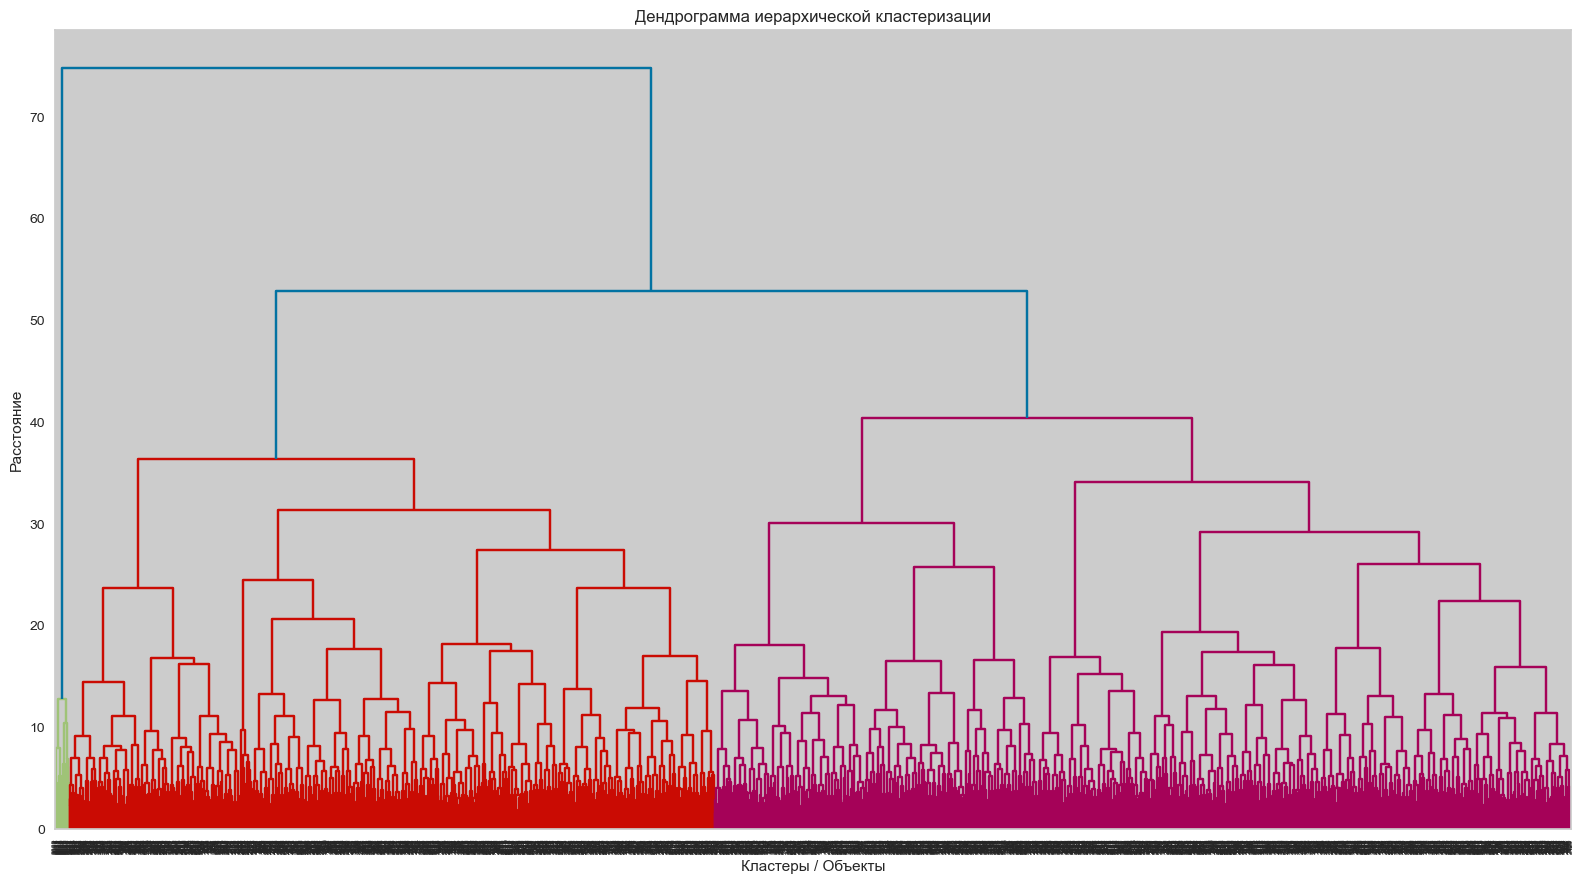

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Вычисляем матрицу связей (linkage)
linkage_matrix = linkage(new_df_clean, method='ward')  # 'ward' минимизирует дисперсию внутри кластеров

# Строим дендрограмму
plt.figure(figsize=(16, 9))
dendrogram(linkage_matrix, orientation='top') 
plt.title("Дендрограмма иерархической кластеризации")
plt.xlabel("Кластеры / Объекты")
plt.ylabel("Расстояние")
plt.tight_layout()
plt.show()

Обучение модели, подсчет средних показателей и размеры кластеров

In [61]:
from sklearn.cluster import AgglomerativeClustering
OPTIMAL_K_HIER = 3
# Обучаем модель на всех данных
agg_clust = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_hier = agg_clust.fit_predict(new_df_clean.values)

# Добавляем метки к исходным данным для интерпретации
df_hier = df.loc[new_df_clean.index].copy()
df_hier['cluster_hier'] = cluster_labels_hier
numeric_cols = ['age', 'BMI', 'systolic_bp', 'cholesterol_mg_dl',
                'fasting_glucose_mg_dl', 'symptom_score', 'CRP_mg_L', 'WBC_10e9_L', 'Disease']

cluster_means_hier = df_hier.groupby('cluster_hier')[numeric_cols].mean().round(2)

print(f"Средние значения по кластерам (иерархическая, k = {OPTIMAL_K_HIER}):")
display(cluster_means_hier)

print("\nРазмеры кластеров:")
display(df_hier['cluster_hier'].value_counts().sort_index())

Средние значения по кластерам (иерархическая, k = 3):


,age,BMI,systolic_bp,cholesterol_mg_dl,fasting_glucose_mg_dl,symptom_score,CRP_mg_L,WBC_10e9_L,Disease
cluster_hier,,,,,,,,,
0,64.78,25.81,123.01,204.04,96.20,2.09,1.11,6.87,0.02
1,60.24,25.23,120.93,482.86,91.66,2.05,26.67,7.45,0.03
2,37.61,27.37,121.67,194.23,92.01,1.97,1.13,6.75,0.01



Размеры кластеров:


cluster_hier
0    1711
1      29
2    1289
Name: count, dtype: int64

#### Выводы:
- Кластер 0 (n = 1711) представляет собой наиболее многочисленную и гомогенную группу — пожилых пациентов со средним возрастом 64.8 лет. У этой группы наблюдается умеренно повышенный уровень холестерина (204 мг/дл), нормальный уровень С-реактивного белка (1.11 мг/л) и лейкоцитов (6.87 ×10⁹/л), что свидетельствует об отсутствии системного воспаления. Симптоматика выражена умеренно (2.09 балла), а частота подтверждённого заболевания составляет всего 2%. Этот кластер можно интерпретировать как стареющую, но стабильную группу, характерную для первичного звена здравоохранения: пациенты имеют возрастные риски, но не демонстрируют признаков активного патологического процесса.
- Кластер 1 (n = 29), напротив, является крайне малочисленным, но клинически значимым. Несмотря на схожий с кластером 0 возраст (60.2 года), пациенты этой группы характеризуются экстремальными лабораторными отклонениями: уровень холестерина достигает 482.9 мг/дл — почти в 2.4 раза выше среднего по выборке и значительно превышает порог высокого риска сердечно-сосудистых заболеваний. Ещё более тревожным является высокий уровень СРБ — 26.67 мг/л, что указывает на выраженный системный воспалительный ответ. При этом симптоматика остаётся умеренной (2.05 балла), а диагностированное заболевание подтверждено лишь у 3% пациентов. Это свидетельствует о патологии, требующей углублённого обследования.
- Кластер 2 (n = 1289) объединяет молодых пациентов (средний возраст — 37.6 лет) с практически нормальными биомаркерами: холестерин — 194.2 мг/дл, СРБ — 1.13 мг/л, лейкоциты — 6.75 ×10⁹/л. Симптоматика минимальна (1.97 балла), заболеваемость — 1%. Эта группа представляет собой референсную популяцию здоровых или почти здоровых лиц, у которых отсутствуют как метаболические нарушения, так и признаки воспаления. Такие пациенты могут служить контрольной группой при оценке эффективности терапии или при построении прогностических моделей.


Подсчет внутренних и внешних метрик

In [62]:
X_full = new_df_clean.values

print("Метрики качества иерархической кластеризации")
print(f"Silhouette Score:          {silhouette_score(X_full, cluster_labels_hier):.4f}")
print(f"Calinski-Harabasz Index:   {calinski_harabasz_score(X_full, cluster_labels_hier):.2f}")
print(f"Davies-Bouldin Index:      {davies_bouldin_score(X_full, cluster_labels_hier):.4f}")

Метрики качества иерархической кластеризации
Silhouette Score:          0.0537
Calinski-Harabasz Index:   229.17
Davies-Bouldin Index:      3.0828


#### Выводы:
- Коэффициент силуэта (Silhouette Score) составил 0.0537, что близко к нулю. Это указывает на слабую разделимость кластеров: многие объекты находятся примерно на одинаковом расстоянии от центроидов своего и соседних кластеров, что свидетельствует о значительном перекрытии групп. В идеальном случае значение силуэта стремится к 1, тогда как отрицательные значения говорят о явной ошибке разбиения. Таким образом, выявленные кластеры нельзя считать чётко изолированными.
- Индекс Калинского–Харабаша (Calinski-Harabasz Index) имеет значение 229.17, что формально указывает на наличие достаточного межкластерного расстояния по сравнению с внутрикластерной дисперсией. Однако в совокупности с низким силуэтом это говорит лишь о том, что центроиды кластеров разнесены в пространстве признаков, но внутри самих кластеров наблюдается высокая неоднородность.
- индекс Дэвиса–Боулдина (Davies-Bouldin Index), равный 3.0828. Этот индекс тем лучше, чем ближе к нулю, поскольку представляет собой среднее отношение внутрикластерного разброса к расстоянию между центроидами. Значение выше 2–3 считается признаком плохой компактности и слабой разделённости кластеров.

В совокупности метрики указывают на то, что иерархическая кластеризация выявила лишь слабую внутреннюю структуру в данных. Это типично для реальных медицинских наборов, где границы между состояниями размыты, а вариабельность внутри групп (например, по возрасту, симптомам или биомаркерам) велика. 

## Выводы по работе:

В ходе исследования были применены два метода кластеризации — K-Means и иерархическая агломеративная кластеризация — с целью выявления скрытых подгрупп пациентов на основе их демографических, клинических и лабораторных характеристик.

С точки зрения метрик качества, оба метода показали низкие значения коэффициента силуэта (≈0.05–0.07) и высокий индекс Дэвиса–Боулдина (>2.4), что указывает на слабую формальную разделимость кластеров. Однако эта «нечёткость» является ожидаемой для реальных медицинских данных, где границы между состояниями размыты, а вариабельность внутри групп велика. Критически важно, что клиническая интерпретируемость кластеров сохраняется даже при низких метриках, поскольку выявленные профили согласуются с известными патофизиологическими механизмами.\
По совокупности критериев предпочтительным является метод K-Means.
K-Means позволил обнаружить более дифференцированную структуру данных, включая клинически значимую группу пациентов с выраженной субъективной симптоматикой, но нормальными лабораторными показателями.\
В медицинских исследованиях, как правило, важна не иерархическая структура данных, а конечная сегментация пациентов на чёткие группы для принятия клинических решений. K-Means напрямую предоставляет такие группы, тогда как иерархический метод требует дополнительного шага — «среза» дендрограммы, что вносит субъективность.


Таким образом, несмотря на то что оба метода подтвердили наличие устойчивых фенотипических профилей, K-Means является более целесообразным выбором для решения поставленной задачи — выявления практически значимых кластеров пациентов с целью дальнейшей стратификации рисков и персонализации подхода.